In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"data/Video Games Sales.csv")
df

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


#### df.shape

In [3]:
df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'],
      dtype='object')

In [4]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [5]:
null_df1=df[df['Year'].isnull()][['Year','Publisher']]
null_df1

,Year,Publisher
143,NaN,Electronic Arts
253,NaN,Unknown
301,NaN,Unknown
373,NaN,NaN
434,NaN,Warner Bros. Interactive Entertainment
523,NaN,Electronic Arts
524,NaN,Unknown
573,NaN,LucasArts
582,NaN,Unknown
646,NaN,MTV Games


In [6]:
df.dropna(subset=['Publisher'],inplace=True)

In [7]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             27
Genre             0
Publisher         0
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [8]:
null_df2=df[df['Year'].isnull()][['Year','Publisher','Platform','Genre']]
null_df2

,Year,Publisher,Platform,Genre
143,NaN,Electronic Arts,PS2,Sports
253,NaN,Unknown,PC,Strategy
301,NaN,Unknown,PS2,Sports
434,NaN,Warner Bros. Interactive Entertainment,Wii,Adventure
523,NaN,Electronic Arts,X360,Misc
524,NaN,Unknown,GBA,Adventure
573,NaN,LucasArts,Wii,Adventure
582,NaN,Unknown,Wii,Shooter
646,NaN,MTV Games,Wii,Misc
746,NaN,Unknown,PS2,Racing


In [9]:
null_years = df[df['Year'].isnull()]
group1 = null_years.groupby(['Publisher']).size().reset_index(name='Null_Count1')
group2 = null_years.groupby(['Platform']).size().reset_index(name='Null_Count2')
group3 = null_years.groupby(['Genre']).size().reset_index(name='Null_Count3')
print(group1)
print(group2)
print(group3)

                                Publisher  Null_Count1
0                              Activision            1
1                       Eidos Interactive            2
2                         Electronic Arts            3
3                               LucasArts            1
4                               MTV Games            1
5                                Nintendo            1
6                                    Sega            1
7                             Square Enix            1
8                                 Unknown           13
9  Warner Bros. Interactive Entertainment            3
   Platform  Null_Count2
0       3DS            1
1        GB            1
2       GBA            2
3        PC            2
4        PS            1
5       PS2            8
6       PS3            2
7       PSP            2
8       Wii            5
9      X360            1
10       XB            2
          Genre  Null_Count3
0        Action            3
1     Adventure            5
2       

In [10]:
grp1 = df.groupby(['Publisher']).size().reset_index(name='Count1')
grp2 = df.groupby(['Platform']).size().reset_index(name='Count2')
grp3 = df.groupby(['Genre']).size().reset_index(name='Count3')
print(grp1)
print(grp2)
print(grp3)

                                 Publisher  Count1
0                                      3DO       2
1                                505 Games       6
2                              989 Studios       6
3                                ASC Games       1
4                      ASCII Entertainment       1
..                                     ...     ...
89                      Virgin Interactive      12
90                           Vivendi Games       8
91  Warner Bros. Interactive Entertainment      19
92                        Westwood Studios       1
93                             id Software       1

[94 rows x 2 columns]
   Platform  Count2
0       3DS      15
1        DC       6
2        DS     149
3        GB      48
4       GBA      75
5        GC      55
6       GEN      11
7       N64      57
8       NES      60
9        PC      71
10       PS     222
11      PS2     371
12      PS3     202
13      PSP      63
14      PSV       1
15      SAT       3
16      SCD       1
17   

In [11]:
df.dropna(subset=['Year'],inplace=True)

In [12]:
df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

duplicates=df.duplicated()
print(duplicates)

In [13]:
duplicates=df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1902    False
1903    False
1904    False
1905    False
1906    False
Length: 1878, dtype: bool


In [14]:
print(df[duplicates])
print()
print(duplicates.sum())

Empty DataFrame
Columns: [index, Rank, Game Title, Platform, Year, Genre, Publisher, North America, Europe, Japan, Rest of World, Global, Review]
Index: []

0


In [15]:
duplicates_subset = df.duplicated(subset=['Platform','Game Title', 'Publisher','Genre'])
df[duplicates_subset].head(60)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review


In [16]:
df['Year']=df['Year'].astype(int)

In [17]:
df.head(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,2005,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


In [18]:
df.drop(columns=['index'],inplace=True)

In [19]:
df.head()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [20]:
df.rename(columns={"Year":"Year of Release"},inplace=True)

In [21]:
df

,Rank,Game Title,Platform,Year of Release,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1906
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             1878 non-null   int64  
 1   Game Title       1878 non-null   object 
 2   Platform         1878 non-null   object 
 3   Year of Release  1878 non-null   int64  
 4   Genre            1878 non-null   object 
 5   Publisher        1878 non-null   object 
 6   North America    1878 non-null   float64
 7   Europe           1878 non-null   float64
 8   Japan            1878 non-null   float64
 9   Rest of World    1878 non-null   float64
 10  Global           1878 non-null   float64
 11  Review           1878 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 190.7+ KB


In [23]:
df.describe()

,Rank,Year of Release,North America,Europe,Japan,Rest of World,Global,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


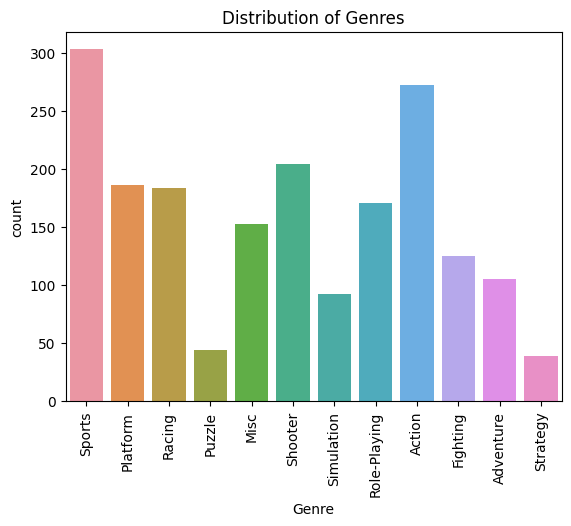

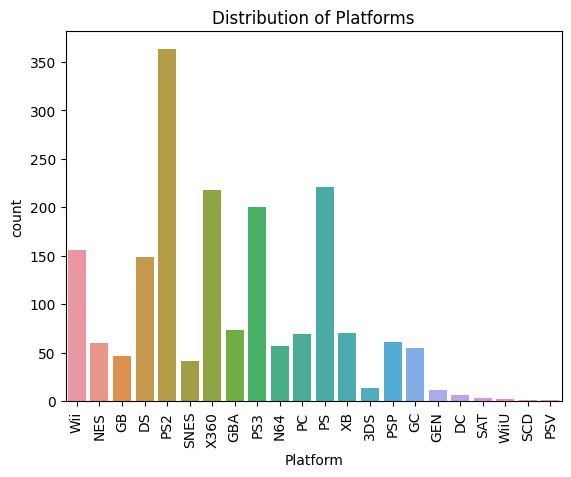

In [24]:
sns.countplot(x=df['Genre'])
plt.xticks(rotation=90)
plt.title('Distribution of Genres')
plt.show()

sns.countplot(x=df['Platform'])
plt.xticks(rotation=90)
plt.title('Distribution of Platforms')
plt.show()


In [25]:
distinct_games_count = df['Game Title'].nunique()
print(distinct_games_count)

1505


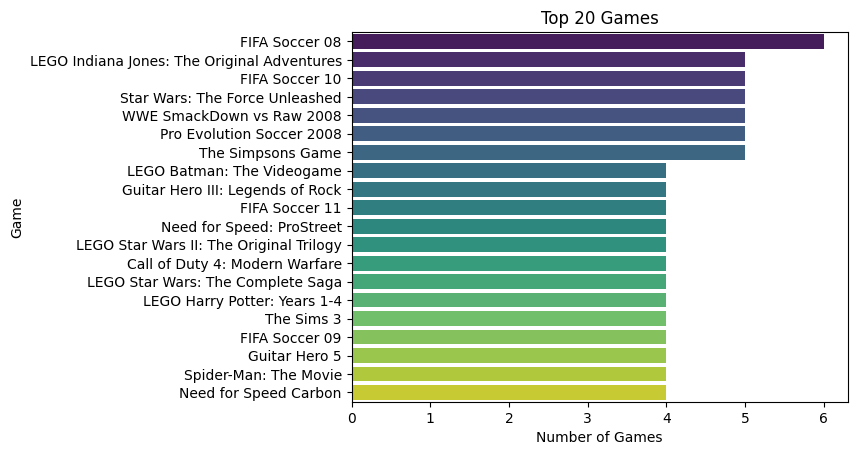

In [26]:
top_games_df = df['Game Title'].value_counts().reset_index()
top_games_df.columns = ['Game Title', 'Count']
top_games_df = top_games_df.sort_values(by='Count', ascending=False)

sns.barplot(x='Count', y='Game Title', data=top_games_df.head(20), palette='viridis')
plt.title('Top 20 Games')
plt.xlabel('Number of Games')
plt.ylabel('Game')
plt.show()

In [27]:
distinct_publishers_count = df['Publisher'].nunique()
print(distinct_publishers_count)

94


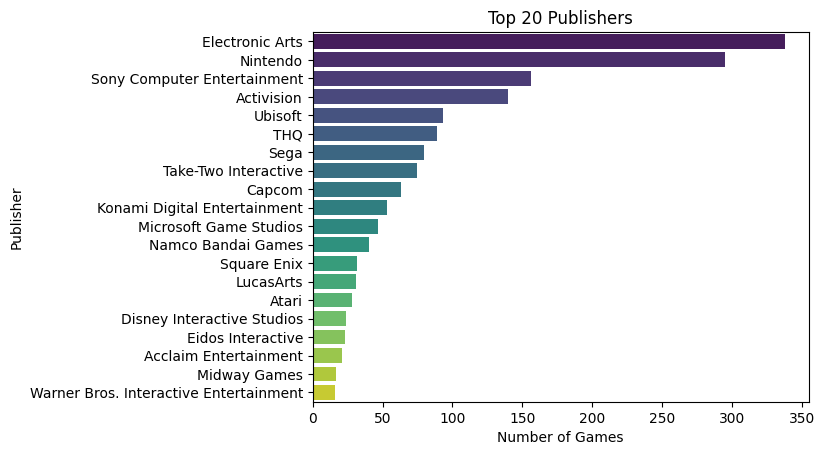

In [28]:
top_publishers_df = df['Publisher'].value_counts().reset_index()
top_publishers_df.columns = ['Publisher', 'Count']  # Rename the columns
top_publishers_df = top_publishers_df.sort_values(by='Count', ascending=False)

top_publishers_df.head(20)

sns.barplot(x='Count', y='Publisher', data=top_publishers_df.head(20), palette='viridis')
plt.title('Top 20 Publishers')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

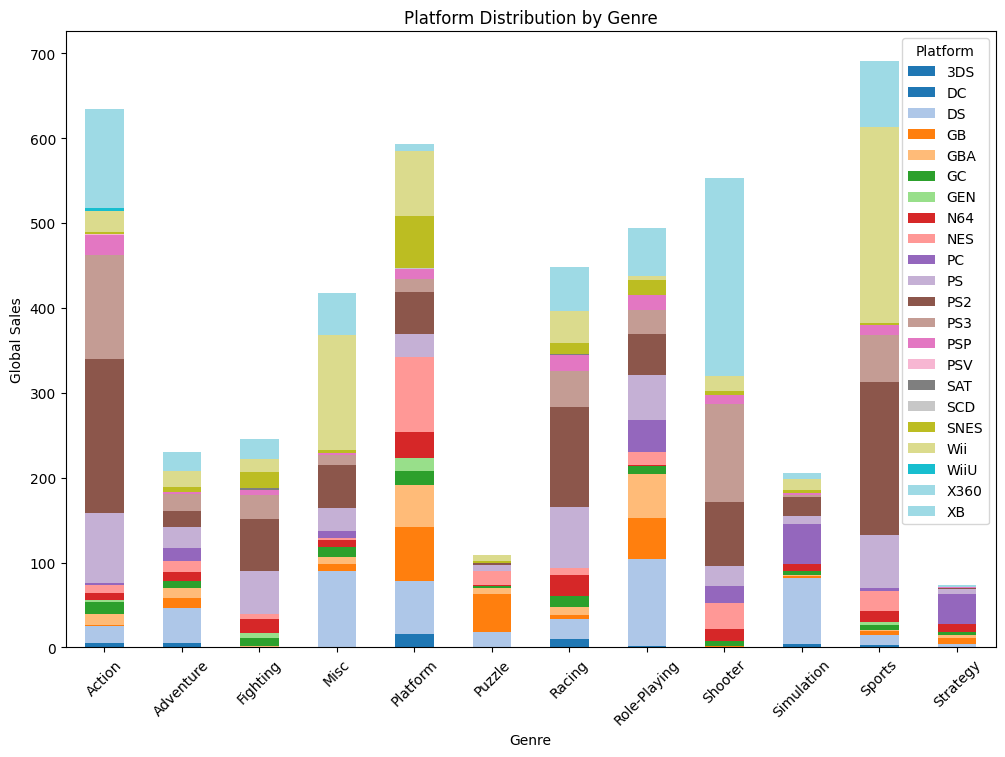

In [29]:
genre_platform_pivot = df.pivot_table(index='Genre', columns='Platform', values='Global', aggfunc='sum', fill_value=0)
genre_platform_pivot.plot(kind='bar', stacked=True, figsize=(12, 8),colormap='tab20')
plt.title('Platform Distribution by Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

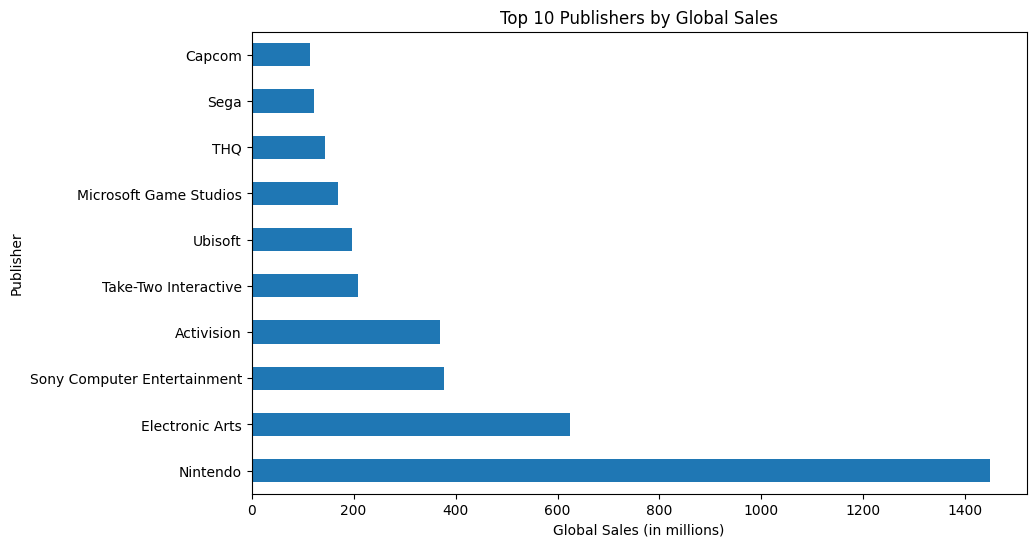

In [30]:
top_publishers = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10)
top_publishers.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


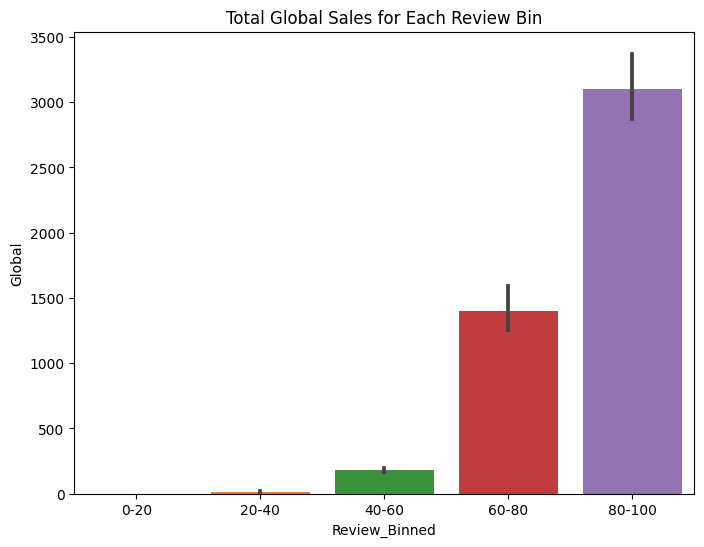

In [31]:
bins = [0, 20, 40, 60, 80, 100]  
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
df['Review_Binned'] = pd.cut(df['Review'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.barplot(x='Review_Binned', y='Global', data=df, estimator=sum)
plt.title('Total Global Sales for Each Review Bin')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


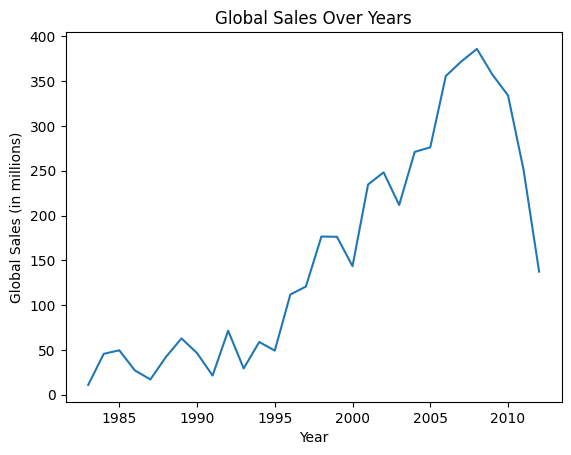

In [32]:
sales_by_year = df.groupby('Year of Release')['Global'].sum().reset_index()
sns.lineplot(x='Year of Release', y='Global', data=sales_by_year)
plt.title('Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

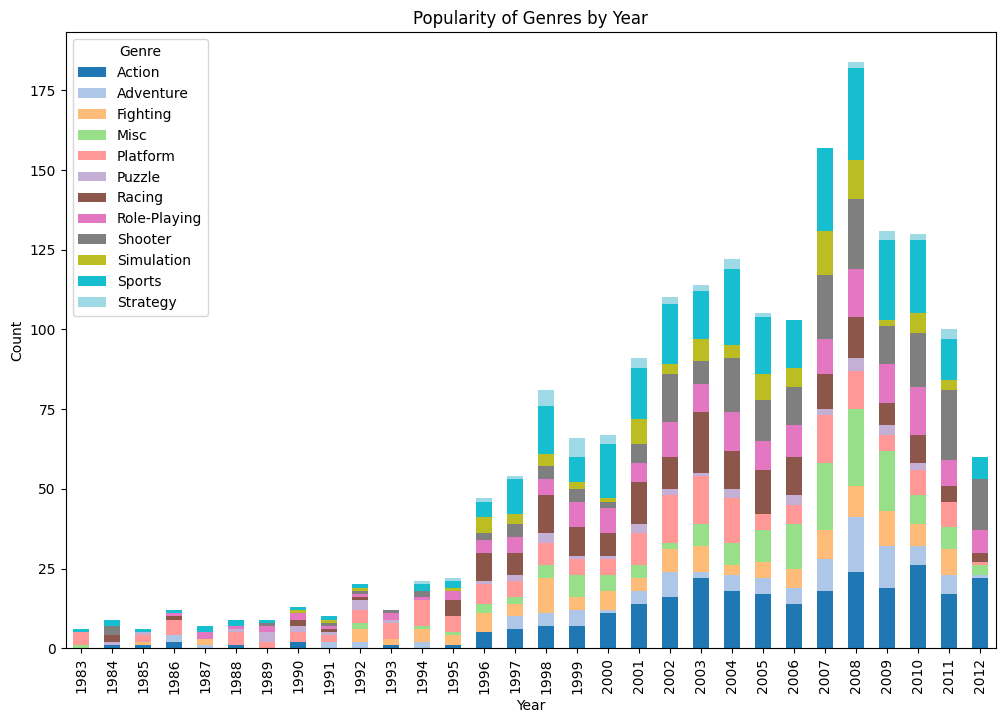

In [33]:
genre_year = df.groupby(['Year of Release', 'Genre']).size().unstack()
genre_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Popularity of Genres by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Genre')
plt.show()


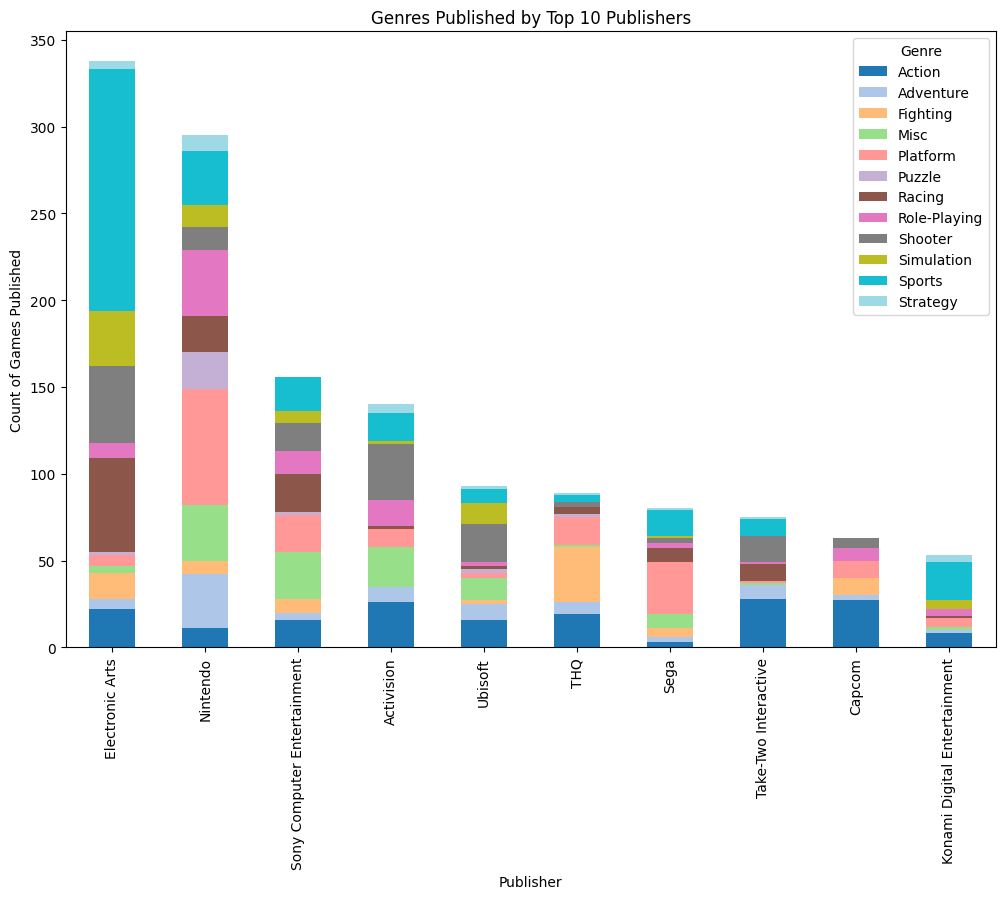

In [34]:
publisher_genre = df.groupby(['Publisher', 'Genre']).size().unstack()
top_10_publishers = publisher_genre.sum(axis=1).nlargest(10).index
top_10_publisher_genre = publisher_genre.loc[top_10_publishers]
top_10_publisher_genre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Genres Published by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count of Games Published')
plt.legend(title='Genre')
plt.show()


/var/folders/dq/ly0vdmzj3zs8xj3dtnyk0_mc0000gn/T/ipykernel_73585/3035327703.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['North America'])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/dq/ly0vdmzj3zs8xj3dtnyk0_mc0000gn/T/ipykernel_73585/3035327703.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

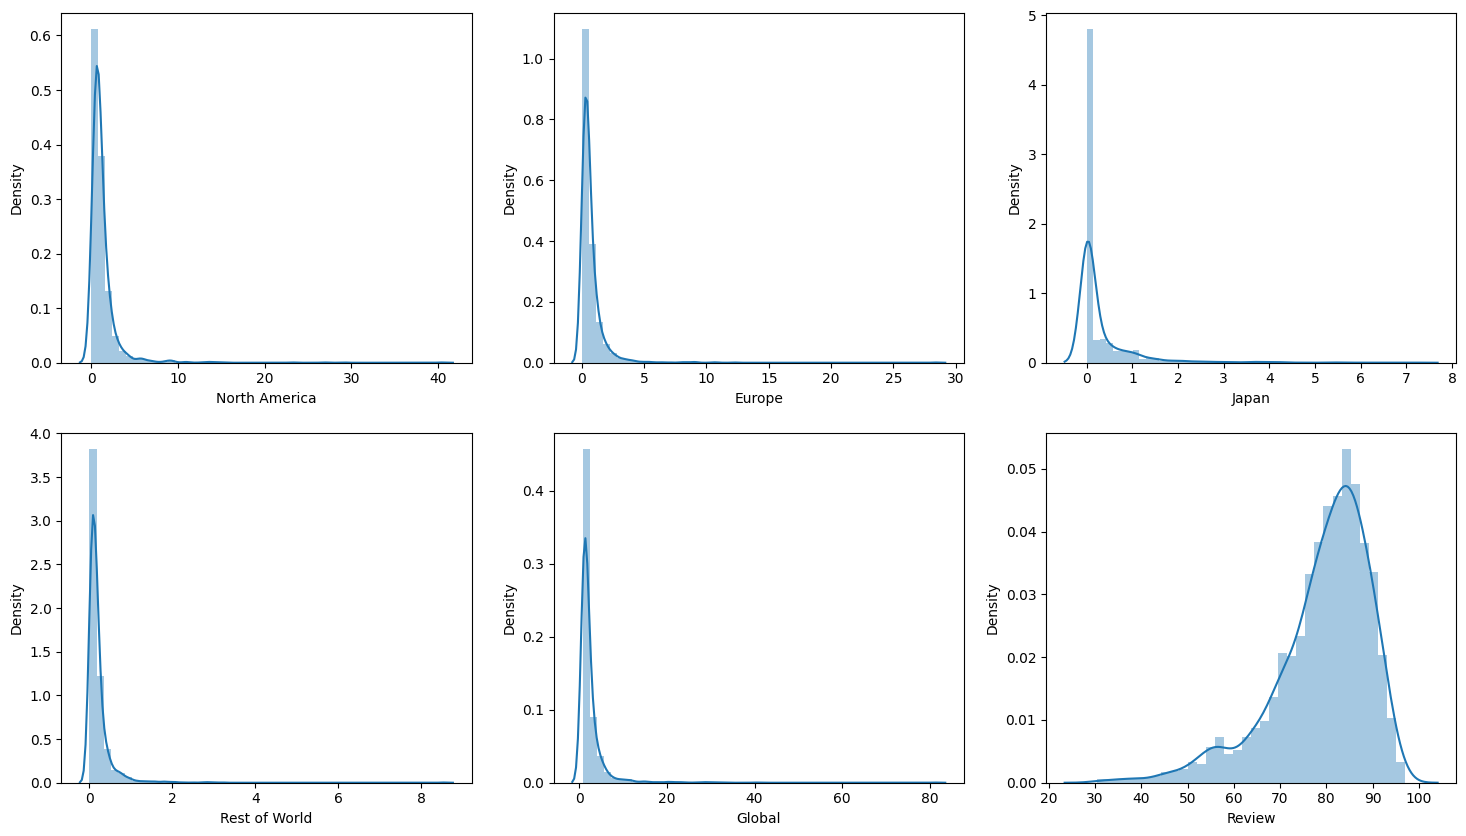

In [35]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.distplot(df['North America'])

plt.subplot(2,3,2)
sns.distplot(df['Europe'])
plt.subplot(2,3,3)
sns.distplot(df['Japan'])

plt.subplot(2,3,4)
sns.distplot(df['Rest of World'])

plt.subplot(2,3,5)
sns.distplot(df['Global'])

plt.subplot(2,3,6)
sns.distplot(df['Review'])


plt.show()



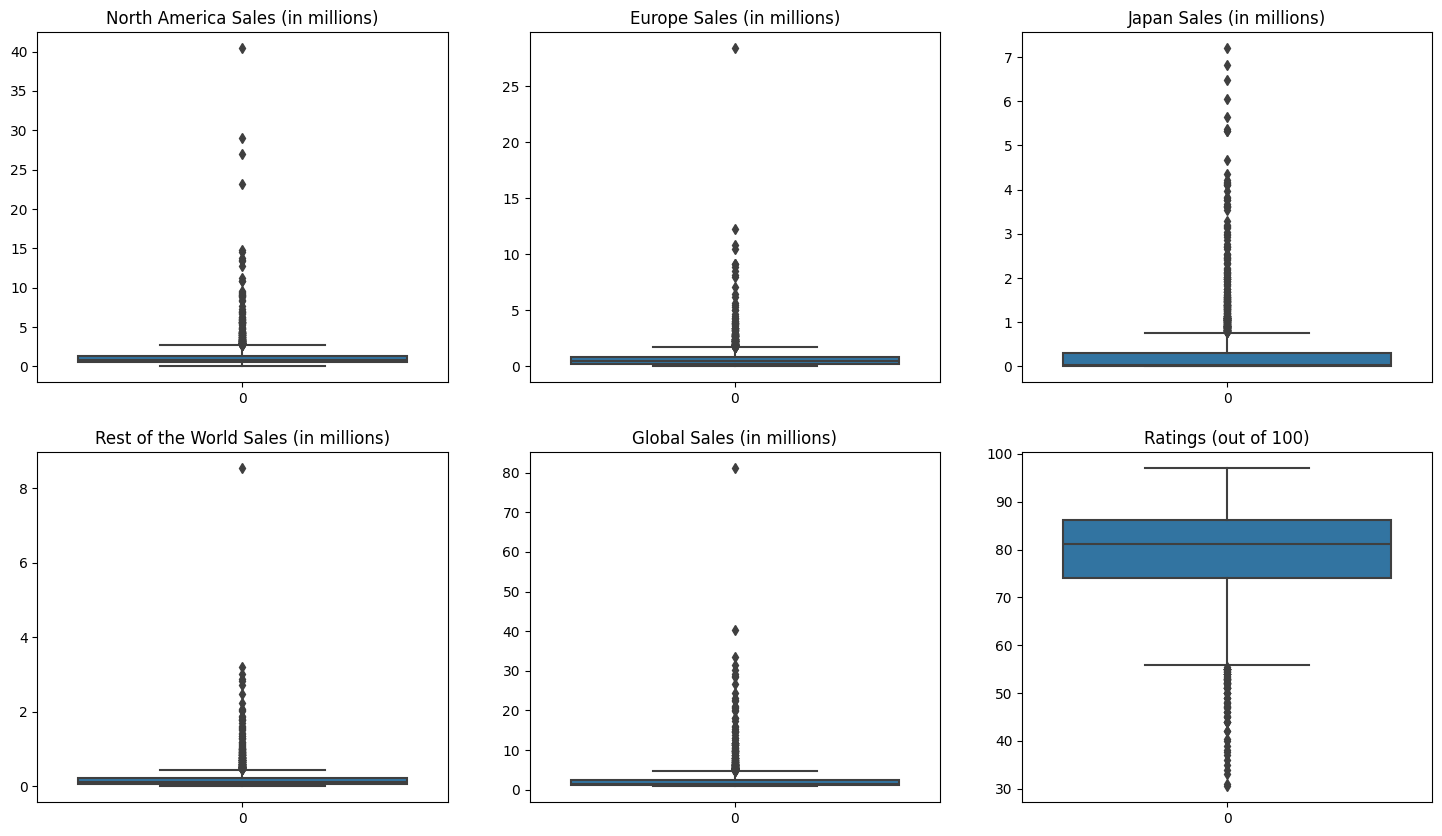

In [36]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sns.boxplot(df['North America'])
plt.title("North America Sales (in millions)")

plt.subplot(2,3,2)
sns.boxplot(df['Europe'])
plt.title("Europe Sales (in millions)")

plt.subplot(2,3,3)
sns.boxplot(df['Japan'])
plt.title("Japan Sales (in millions)")

plt.subplot(2,3,4)
sns.boxplot(df['Rest of World'])
plt.title("Rest of the World Sales (in millions)")

plt.subplot(2,3,5)
sns.boxplot(df['Global'])
plt.title("Global Sales (in millions)")

plt.subplot(2,3,6)
sns.boxplot(df['Review'])
plt.title("Ratings (out of 100)")

plt.show()

In [37]:

df.drop(columns=['Rank','Review_Binned'],inplace=True)

In [38]:
df.head()

,Game Title,Platform,Year of Release,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


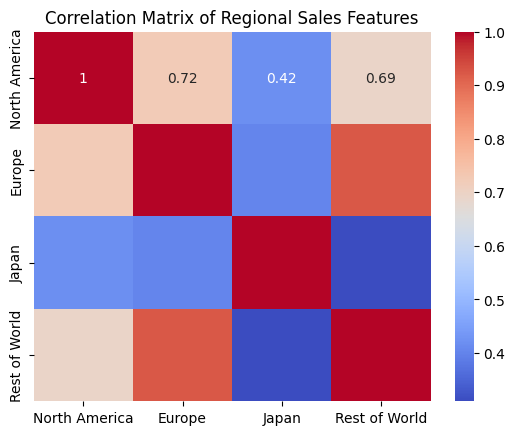

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[['North America', 'Europe', 'Japan', 'Rest of World']].corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Regional Sales Features")
plt.show()

In [40]:
from datetime import datetime
current_year = datetime.now().year
df['Years Since Release'] = current_year - df['Year of Release']
df = df.drop(columns=['Year of Release'])

In [41]:
df

,Game Title,Platform,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Years Since Release
0,Wii Sports,Wii,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,18
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,39
2,Mario Kart Wii,Wii,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,16
3,Wii Sports Resort,Wii,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,15
4,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,35
...,...,...,...,...,...,...,...,...,...,...,...
1902,Lizzie McGuire 2: Lizzie Diaries,GBA,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00,20
1903,Xenoblade Chronicles,Wii,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74,14
1904,SingStar Abba,PS3,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00,16
1905,FIFA Soccer World Championship,PS2,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00,24


In [42]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Global']),df['Global'],
                                                 test_size=0.2,random_state=42)

In [44]:
X_train.head()

,Game Title,Platform,Genre,Publisher,North America,Europe,Japan,Rest of World,Review,Years Since Release
1482,Untold Legends: Brotherhood of the Blade,PSP,Role-Playing,Activision,0.53,0.32,0.01,0.22,78.00,19
273,Jak and Daxter: The Precursor Legacy,PS2,Platform,Sony Computer Entertainment,2.08,1.09,0.15,0.33,90.22,23
185,God of War III,PS3,Action,Sony Computer Entertainment,2.66,1.17,0.12,0.58,92.63,14
1851,Dynasty Warriors 4: Xtreme Legends,PS2,Action,Tecmo Koei,0.17,0.13,0.51,0.04,69.73,21
245,StarCraft II: Wings of Liberty,PC,Strategy,Activision,2.19,1.21,0.00,0.48,91.00,14


In [45]:
y_train.head()

1482    1.07
273     3.64
185     4.53
1851    0.86
245     3.89
Name: Global, dtype: float64

In [46]:
print(X_train.shape)
print(X_test.shape)

(1502, 10)
(376, 10)


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
categorical_cols=[0,1,2,3]
numerical_cols=[4,5,6,7,8,9]
ct=ColumnTransformer(transformers=[('encoding',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),
                                    categorical_cols),
                                   ('scaling',StandardScaler(),numerical_cols)],remainder='passthrough')
X_train_new=ct.fit_transform(X_train)
X_test_new=ct.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [48]:
print(X_train_new.shape)
print(X_test_new.shape)

(1502, 1385)
(376, 1385)


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_new, y_train)
y_pred = rf.predict(X_test_new)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² (R-squared): {r2}')

Mean Squared Error (MSE): 0.08807025263297873
Mean Absolute Error (MAE): 0.1228523936170212
Root Mean Squared Error (RMSE): 0.29676632664940056
R² (R-squared): 0.9789189885549685


In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_new, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_new)

# Predict on the test set
y_test_pred = model.predict(X_test_new)

# Calculate training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"R² (R-squared): {train_r2}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R² (R-squared): {test_r2}")


Training Set Metrics:
Mean Squared Error (MSE): 0.18046010509986835
Mean Absolute Error (MAE): 0.07062929427430097
Root Mean Squared Error (RMSE): 0.4248059617047157
R² (R-squared): 0.9879813912369756

Test Set Metrics:
Mean Squared Error (MSE): 0.08807025263297873
Mean Absolute Error (MAE): 0.1228523936170212
Root Mean Squared Error (RMSE): 0.29676632664940056
R² (R-squared): 0.9789189885549685


In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lasso = Lasso(alpha=0.1) 

lasso.fit(X_train_new, y_train)

# Predicting on both training and test sets
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

# Evaluating model performance on training and test sets
# Training set metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Test set metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)


print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"R² (R-squared): {r2_train}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R² (R-squared): {r2_test}")


Training Set Metrics:
Mean Squared Error (MSE): 0.015591384601905104
Mean Absolute Error (MAE): 0.06371866064050515
Root Mean Squared Error (RMSE): 0.1248654660100426
R² (R-squared): 0.9989616167434878

Test Set Metrics:
Mean Squared Error (MSE): 0.005563031061939741
Mean Absolute Error (MAE): 0.053893186676081464
Root Mean Squared Error (RMSE): 0.07458572961324264
R² (R-squared): 0.998668400305668


In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
xgb_model = XGBRegressor(
    n_estimators=100,        # Number of boosting rounds
    max_depth=6,             # Depth of each tree (can tune this)
    learning_rate=0.1,       # Step size (lower for smoother convergence)
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=1,            # L2 regularization
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_new, y_train)

# Predict on train and test data
y_train_pred = xgb_model.predict(X_train_new)
y_test_pred = xgb_model.predict(X_test_new)

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):",train_rmse)
print("R² (R-squared):", train_r2)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):",test_rmse)
print("R² (R-squared):", test_r2)


Training Set Metrics:
Mean Squared Error (MSE): 0.004813567156693395
Mean Absolute Error (MAE): 0.05014648079713397
Root Mean Squared Error (RMSE): 0.06937987573276126
R² (R-squared): 0.9996794173405872

Test Set Metrics:
Mean Squared Error (MSE): 0.0638097562834579
Mean Absolute Error (MAE): 0.11462528157741467
Root Mean Squared Error (RMSE): 0.2526059308160794
R² (R-squared): 0.9847261230404086


In [54]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(model, X_train_new, y_train, cv=5, scoring='neg_mean_squared_error')  # Use MSE as a scoring metric
print(f"Random Forest - Cross-Validation MSE: {rf_cv_scores.mean()}")
lasso_cv_scores = cross_val_score(lasso, X_train_new, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression - Cross-Validation MSE: {lasso_cv_scores.mean()}")
xgb_cv_scores = cross_val_score(xgb_model, X_train_new, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"XGBoost - Cross-Validation MSE: {xgb_cv_scores.mean()}")


Random Forest - Cross-Validation MSE: -2.1181538414895686
Lasso Regression - Cross-Validation MSE: -0.027077307743703937
XGBoost - Cross-Validation MSE: -2.065035874742038


In [55]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the Random Forest model
rf = RandomForestRegressor()

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_rf.fit(X_train_new, y_train)

# Best Parameters and Best Score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best MSE (Cross-Validation) for Random Forest:", grid_search_rf.best_score_)

# Example for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

# Create the XGBoost model
xgb = XGBRegressor()

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search_xgb.fit(X_train_new, y_train)

# Best Parameters and Best Score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best MSE (Cross-Validation) for XGBoost:", grid_search_xgb.best_score_)


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best MSE (Cross-Validation) for Random Forest: -2.076362118212141
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best MSE (Cross-Validation) for XGBoost: -1.9554382580074692


In [56]:
import joblib
joblib.dump(lasso, 'final_lasso_model.joblib')
print("Final Lasso model saved as 'final_lasso_model.joblib'")


Final Lasso model saved as 'final_lasso_model.joblib'


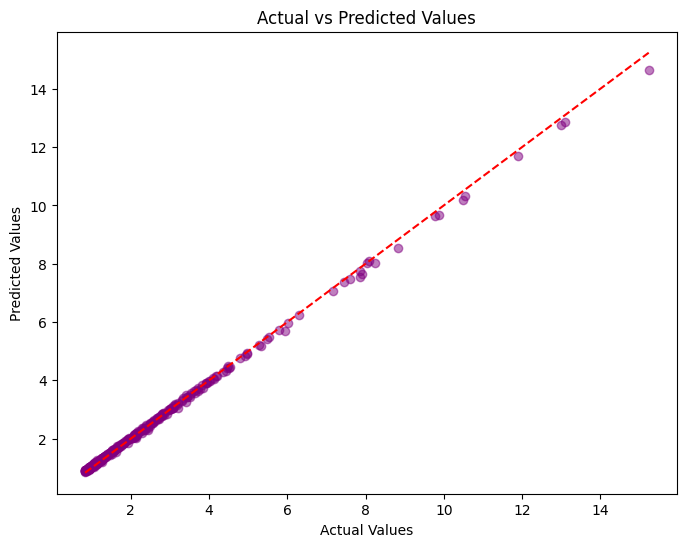

In [57]:
from sklearn.metrics import mean_squared_error

# Generate predictions on the test set
y_pred_test = lasso.predict(X_test_new)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
